In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
df=pd.read_csv("C:\\Users\\dell\\Desktop\\data sets\\insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()
df=df.drop_duplicates()

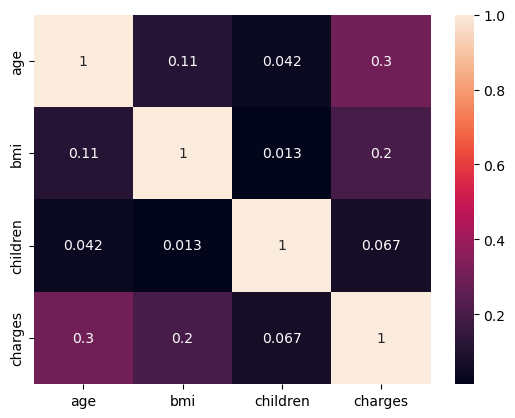

In [10]:
sns.heatmap(df.drop(columns=['smoker','region','sex']).iloc[:].corr(),annot=True)
plt.show()

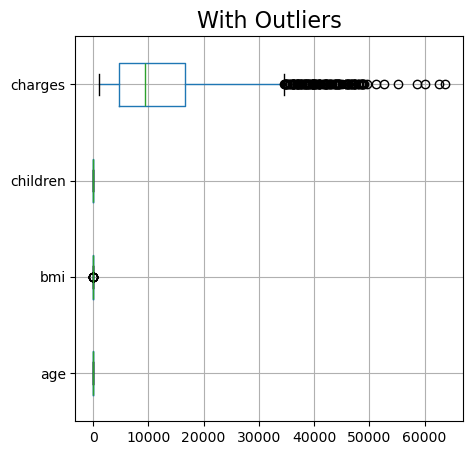

In [11]:
def BoxPlotOutlears(df):
    cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
    plt.figure(figsize=(5,5))
    df[cont].boxplot(vert=0)
    plt.title('With Outliers',fontsize=16)
    plt.show()
BoxPlotOutlears(df)

In [12]:
def removeOut(data,col_to_cap):
    df_capped=data.copy()
    for col in col_to_cap:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_fence=Q1-1.5*IQR;
        upper_fence=Q1+1.5*IQR;
        df_capped[col] = np.where(df_capped[col] > upper_fence, upper_fence, df_capped[col])
        df_capped[col] = np.where(df_capped[col] < lower_fence, lower_fence, df_capped[col])
    return df_capped

df=removeOut(df,['bmi','charges'])

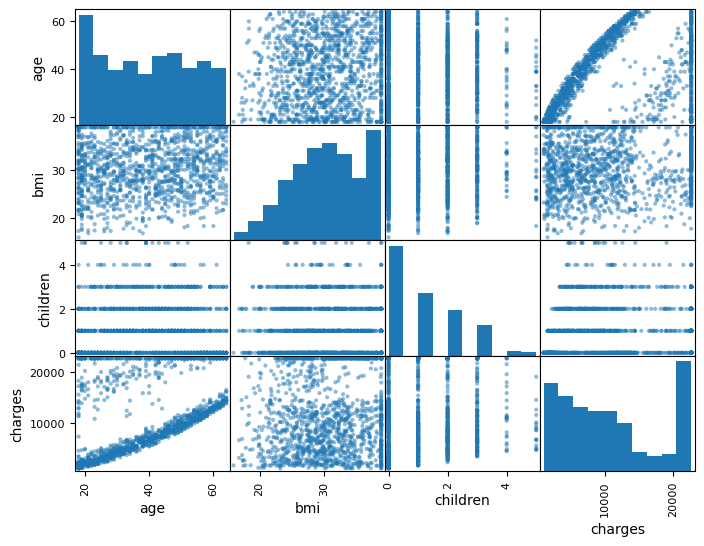

In [13]:
scatter_matrix(df,figsize=(8,6))
plt.show()

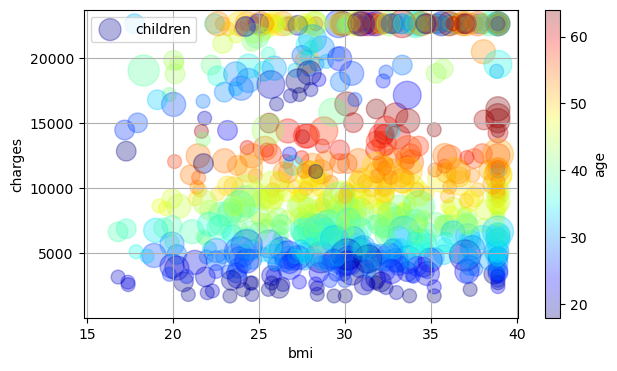

In [14]:
df.plot(kind="scatter",x="bmi",y="charges",s=df["children"]*100,c="age",cmap="jet",label="children",grid=True,alpha=0.3,colorbar=True,sharex=False,figsize=(7,4))
plt.show()

In [15]:
print(df['region'].unique())
print(df['smoker'].unique())
print(df['sex'].unique())

['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']
['female' 'male']


In [16]:
new_df=pd.get_dummies(df,columns=['region','smoker','sex'],drop_first=True)

In [17]:
df['age_sq'] = df['age'] ** 2
for col in new_df.select_dtypes(include='bool').columns:
    new_df[col] = new_df[col].astype(int)
new_df['bmi_smoker_int'] = new_df['bmi'] * new_df['smoker_yes']
new_df['charges_log'] = np.log(new_df['charges'])

In [18]:
new_df

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male,bmi_smoker_int,charges_log
0,19,27.900,0,16884.924000,0,0,1,1,0,27.90,9.734176
1,18,33.770,1,1725.552300,0,1,0,0,1,0.00,7.453302
2,28,33.000,3,4449.462000,0,1,0,0,1,0.00,8.400538
3,33,22.705,0,21984.470610,1,0,0,0,1,0.00,9.998092
4,32,28.880,0,3866.855200,1,0,0,0,1,0.00,8.260197
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.548300,1,0,0,0,1,0.00,9.268661
1334,18,31.920,0,2205.980800,0,0,0,0,0,0.00,7.698927
1335,18,36.850,0,1629.833500,0,1,0,0,0,0.00,7.396233
1336,21,25.800,0,2007.945000,0,0,1,0,0,0.00,7.604867


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X1=new_df.drop('charges',axis=1)
Y=new_df[['charges']]

In [21]:
poly_feture=PolynomialFeatures(degree=2,include_bias=False)
X=poly_feture.fit_transform(X1)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [23]:
scale=StandardScaler()
x_train_std=scale.fit_transform(x_train)
x_test_std=scale.transform(x_test)

In [24]:
model=LinearRegression()
model.fit(x_train_std,y_train)
y_pre=model.predict(x_test_std)

In [25]:
rm=mean_squared_error(y_pre,y_test)
rms=np.sqrt(rm)
r2=r2_score(y_pre,y_test)
print(f"rms error: {rms}")
print(f"r2 error: {r2}")

rms error: 389.8272144527154
r2 error: 0.9970806978195355


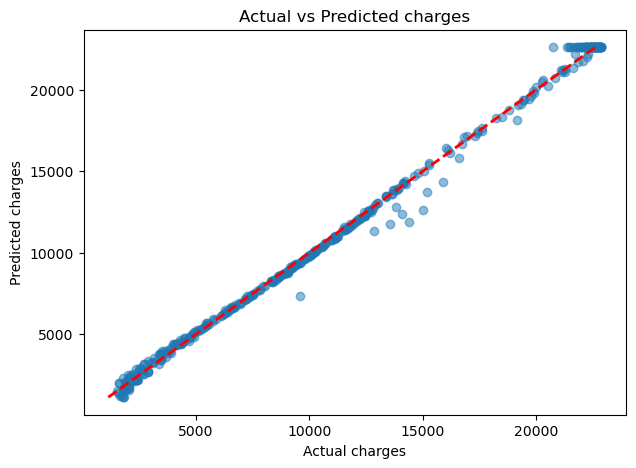

In [26]:
plt.figure(figsize=(7,5))
plt.scatter(y_pre,y_test,alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual vs Predicted charges')
plt.show()
plt.show()